## Model example
---

Example showing how to create a GPD/EQTransformer model, load pretrained weights from the SeisBench repository and annotate a waveform.

**Current version of the model API is incomplete and subject to change.**

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('./', os.pardir)))

In [3]:
import numpy as np
import torch
import obspy
import matplotlib.pyplot as plt

from seisbench.models import GPD, WaveformModel, EQTransformer

### Build a GPD model from scratch or using pretrained waveforms from the SeisBench remote repository

In [4]:
model = GPD()

In [5]:
model = GPD.from_pretrained("dummy")

In [6]:
print(model.weights_docstring)

Randomly initialized model without any training. Just for debug purpose.

Jannes Münchmeyer (munchmej@gfz-potsdam.de)


### Annotate obspy example waveform and visualize predictions

In [7]:
stream = obspy.read()

In [8]:
annotations = model.annotate(stream)

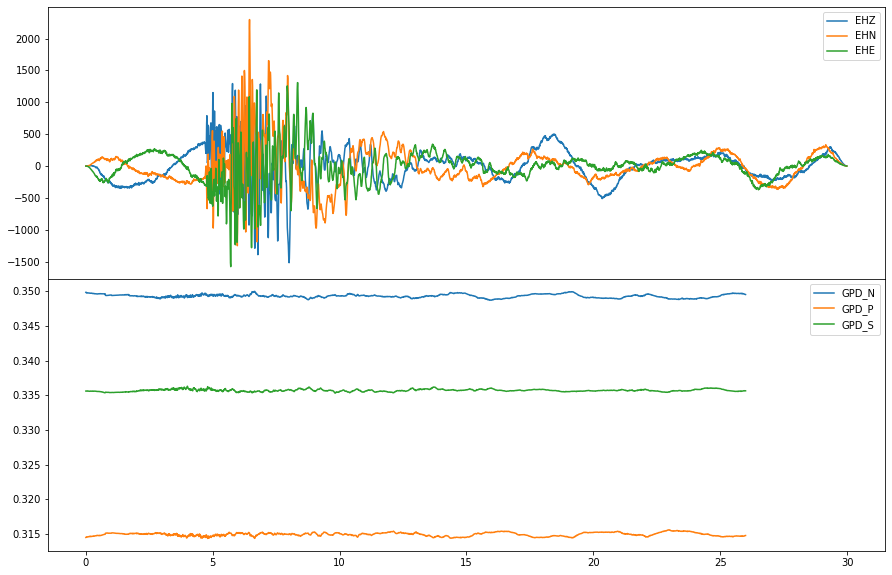

In [9]:
fig = plt.figure(figsize=(15, 10))
axs = fig.subplots(2, 1, sharex=True, gridspec_kw={"hspace": 0})

for i in range(3):
    axs[0].plot(stream[i].times(), stream[i].data, label=stream[i].stats.channel)
    axs[1].plot(annotations[i].times(), annotations[i].data, label=annotations[i].stats.channel)

axs[0].legend()
axs[1].legend()

### Download waveforms through FDSN and annotate with EQTransformer

In [10]:
model = EQTransformer.from_pretrained("original")

In [11]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime

In [12]:
client = Client("GFZ")

t = UTCDateTime("2014/04/02")

stream = client.get_waveforms(network="CX", station="PB01", location="*", channel="HH?", starttime=t-500, endtime=t+600)
stream += client.get_waveforms(network="CX", station="PB02", location="*", channel="HH?", starttime=t-500, endtime=t+600)

In [13]:
annotations = model.annotate(stream)

(-1500000.0, 1500000.0)

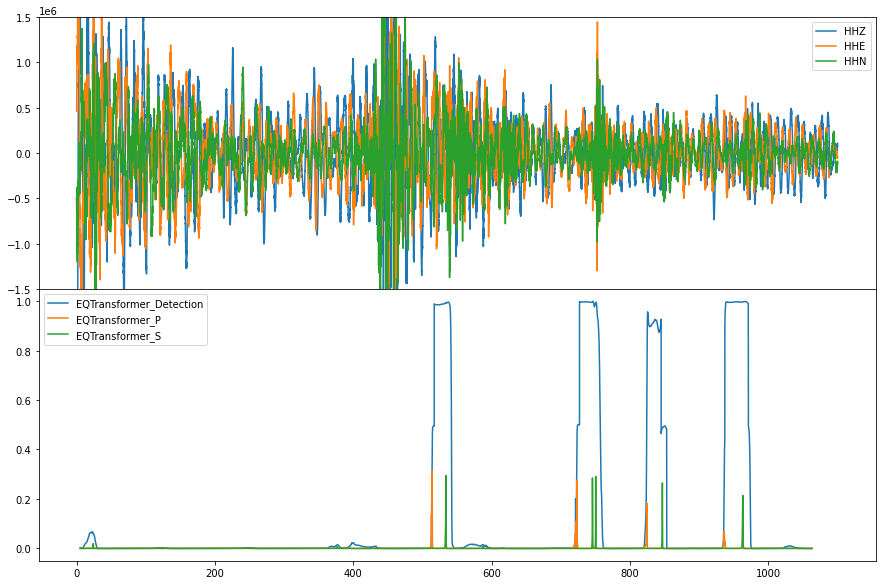

In [14]:
fig = plt.figure(figsize=(15, 10))
axs = fig.subplots(2, 1, sharex=True, gridspec_kw={"hspace": 0})

offset = annotations[0].stats.starttime - stream[0].stats.starttime
for i in range(3):
    axs[0].plot(stream[i].times(), stream[i].data, label=stream[i].stats.channel)
    axs[1].plot(annotations[i].times() + offset, annotations[i].data, label=annotations[i].stats.channel)

axs[0].legend()
axs[1].legend()
axs[0].set_ylim(-1.5e6, 1.5e6)

(-3000000.0, 3000000.0)

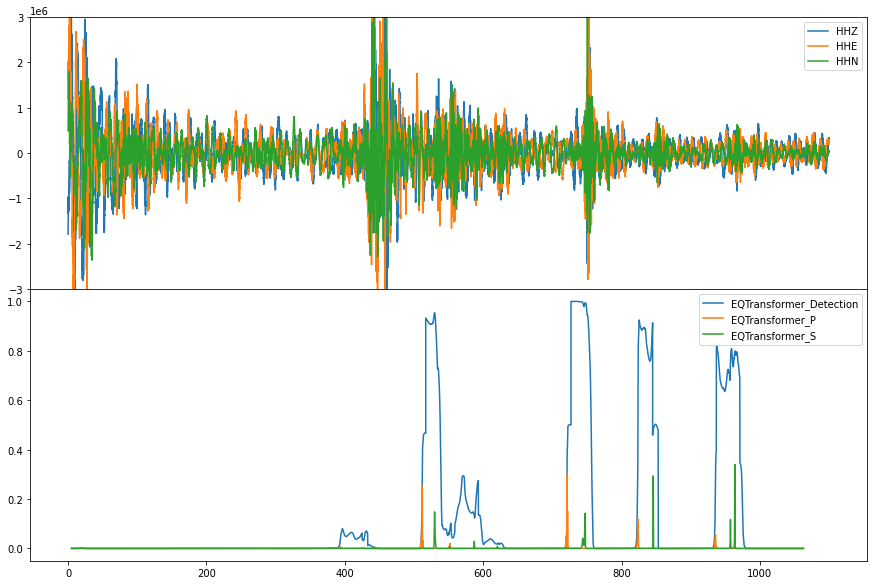

In [15]:
fig = plt.figure(figsize=(15, 10))
axs = fig.subplots(2, 1, sharex=True, gridspec_kw={"hspace": 0})

offset = annotations[0].stats.starttime - stream[0].stats.starttime
for i in range(3, 6):
    axs[0].plot(stream[i].times(), stream[i].data, label=stream[i].stats.channel)
    axs[1].plot(annotations[i].times() + offset, annotations[i].data, label=annotations[i].stats.channel)

axs[0].legend()
axs[1].legend()
axs[0].set_ylim(-3e6, 3e6)